In [115]:
import pandas as pd
import numpy as np
import random

In [205]:
df  = pd.read_csv("data/nyc_train_validate.csv")
# df = pd.read_csv("data/nyc_test.csv")

In [175]:
df.head()

,id,person_id,trip_n,travel_date,travel_date_dow,o_purpose_category,d_purpose_category,num_non_hh_travelers,num_hh_travelers,num_travelers,...,rent_own,income_aggregate,num_people,num_adults,num_kids,num_workers,num_students,disability,trip_distance,mode
0,0,0,0,30/05/2019,4,-9998,2,0,1,1,...,2,4,5,3,2,1,2,none,13.4,subway
1,1,0,1,01/06/2019,6,-9998,1,0,1,1,...,2,4,5,3,2,1,2,none,3.7,drive
2,2,0,2,02/06/2019,7,-9998,7,1,2,3,...,2,4,5,3,2,1,2,none,9.8,drive
3,3,0,3,02/06/2019,7,7,7,1,2,3,...,2,4,5,3,2,1,2,none,11.1,drive
4,4,0,4,03/06/2019,1,-9998,7,0,1,1,...,2,4,5,3,2,1,2,none,2.5,drive


In [179]:
# delete rows without personid (54)
df = df[df['person_id']!=-9998]

## o_purpose_category

In [180]:
def process_o_purpose_category(df, row):
    '''
    impute by trips with the same person_id, travel date of week, d_purpose_category; otherwise, impute with all data by probability
    '''
    # if not missing, return original value
    if row['o_purpose_category'] >= 0:
        return row['o_purpose_category']
    
    # if missing, select similar rows
    temp = df[(df['person_id']==row['person_id'])&\
              (df['travel_date_dow']==row['travel_date_dow'])&\
              (df['d_purpose_category']==row['d_purpose_category'])&\
              (df['o_purpose_category']!=-9998)]
    
    # if rows that satisify conditions are empty
    if temp.empty:
        o_purpose = df[(df['travel_date_dow']==row['travel_date_dow'])&\
                  (df['d_purpose_category']==row['d_purpose_category'])&\
                   (df['o_purpose_category']!=-9998)]['o_purpose_category']
        
        percentage = o_purpose.value_counts().cumsum() / o_purpose.value_counts().sum()
        random_number = random.uniform(0, 1)

        return percentage[percentage>random_number].index[0]
    
    return temp['o_purpose_category'].mode()[0]

In [181]:
random.seed(42)
df['o_purpose_category'] = df.apply(lambda x:process_o_purpose_category(df,x), axis=1)

## gender

In [183]:
gender = df[df['gender']!=-9998]['gender']
gender = gender.value_counts().cumsum() / gender.value_counts().sum()
def process_gender(df, row):
    '''
    impute by the gender distribution of the whole dataset
    '''
    if row['gender'] >= 0:
        return row['gender']
    random_number = random.uniform(0, 1)
    return gender[gender>random_number].index[0]

In [184]:
random.seed(42)
df['gender'] = df.apply(lambda x:process_gender(df,x), axis=1)

## license

In [185]:
def process_license(df, row):
    '''
    impute by trips with the same age and gender
    '''
    if row['license'] >= 0:
        return row['license']

    temp = df[(df['person_id']==row['person_id'])&\
              (df['license']!=-9998)]
    
    if temp.empty:
        license = df[(df['age']==row['age'])&\
                  (df['gender']==row['gender'])&\
                  (df['license']!=-9998)]['license']
        if license.empty:
            license = df[(df['age']==row['age'])&\
                      (df['license']!=-9998)]['license']
            
        percentage = license.value_counts().cumsum() / license.value_counts().sum()
        random_number = random.uniform(0, 1)
        return percentage[percentage>random_number].index[0]
    
    return temp['license'].mode()[0]    

In [186]:
random.seed(42)
df['license'] = df.apply(lambda x:process_license(df,x), axis=1)

In [187]:
df[df['license'].isna()]

,id,person_id,trip_n,travel_date,travel_date_dow,o_purpose_category,d_purpose_category,num_non_hh_travelers,num_hh_travelers,num_travelers,...,rent_own,income_aggregate,num_people,num_adults,num_kids,num_workers,num_students,disability,trip_distance,mode


## education

In [188]:
education = df[df['education']!=-9998]['education']
education = education.value_counts().cumsum() / education.value_counts().sum()
def process_education(df, row):
    '''
    impute by the education distribution of the whole dataset
    '''
    if row['education'] >= 0:
        return row['education']
    random_number = random.uniform(0, 1)
    return education[education>=random_number].index[0]

In [189]:
random.seed(42)
df['education'] = df.apply(lambda x:process_education(df,x), axis=1)

## industry

In [191]:
industry = df[df['industry']!=-9998]['industry']
industry = industry.value_counts().cumsum() / industry.value_counts().sum()
def process_industry(df, row):
    '''
    impute by the industry distribution of the whole dataset
    '''
    if row['industry'] >= 0:
        return row['industry']
    random_number = random.uniform(0, 1)
    return industry[industry>=random_number].index[0]

In [192]:
random.seed(42)
df['industry'] = df.apply(lambda x:process_industry(df,x), axis=1)

## income

In [193]:
def process_income(df, row):
    '''
    impute by trips with the same age, gender, education, industry and income
    '''
    if row['income_aggregate'] >= 0:
        return row['income_aggregate']

    income = df[(df['age']==row['age'])&\
          (df['gender']==row['gender'])&\
          (df['education']==row['education'])&\
          (df['industry']==row['industry'])&\
          (df['income_aggregate']!=-9998)]['income_aggregate']

    
    if income.empty:
        income = df[(df['age']==row['age'])&\
              (df['education']==row['education'])&\
              (df['income_aggregate']!=-9998)]['income_aggregate']
                    
    percentage = income.value_counts().cumsum() / income.value_counts().sum()
    random_number = random.uniform(0, 1)
    return percentage[percentage>random_number].index[0] 

In [195]:
df['income_aggregate'] = df.apply(lambda x:process_income(df,x), axis=1)

## residence type

In [196]:
def process_restype(df, row):
    '''
    impute by trips with the same income, number of people in house
    '''
    if row['res_type'] >= 0:
        return row['res_type']

    restype = df[(df['income_aggregate']==row['income_aggregate'])&\
              (df['num_people']==row['num_people'])&\
              (df['res_type']!=-9998)]['res_type']
    
    if restype.empty:
        restype = df[(df['income_aggregate']==row['income_aggregate'])&\
                  (df['res_type']!=-9998)]['res_type']
    
    
    percentage = restype.value_counts().cumsum() / restype.value_counts().sum()
    random_number = random.uniform(0, 1)
    return percentage[percentage>random_number].index[0]      

In [197]:
df['res_type'] = df.apply(lambda x:process_restype(df,x), axis=1)

## trip distance category
Add a column named `trip_distance_category` to categorize the trip distance into three categories 
- short: less than 0.5 miles
- medium: 0.5 to 3 miles
- long: more than 3 miles (up to 100)

In [198]:
import matplotlib.pyplot as plt

def add_trip_distance_category(df):
    
    plot = plt.hist(df['trip_distance'], bins=100)

    df['trip_distance_category'] = pd.cut(df['trip_distance'], bins=[0, 0.5, 3, 100], labels=['short', 'medium', 'long'])

    for length in ['short', 'medium', 'long']:
        print('percentage of {} trips: {:.2f}%'.format(length, 100*sum(df['trip_distance_category'] == length) / len(df)))

percentage of short trips: 38.42%
percentage of medium trips: 35.39%
percentage of long trips: 26.18%


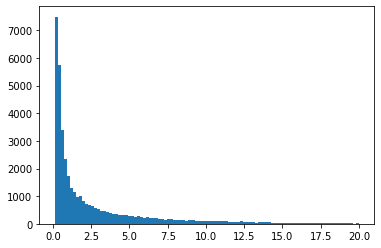

In [199]:
add_trip_distance_category(df)

# Export processed dataframe

In [202]:
df.to_csv('data/data_processed_train.csv', index=False)
# df.to_csv('data/data_processed_test.csv', index=False)

In [201]:
df

,id,person_id,trip_n,travel_date,travel_date_dow,o_purpose_category,d_purpose_category,num_non_hh_travelers,num_hh_travelers,num_travelers,...,income_aggregate,num_people,num_adults,num_kids,num_workers,num_students,disability,trip_distance,mode,trip_distance_category
0,0,0,0,30/05/2019,4,7,2,0,1,1,...,4,5,3,2,1,2,none,13.4,subway,long
1,1,0,1,01/06/2019,6,6,1,0,1,1,...,4,5,3,2,1,2,none,3.7,drive,long
2,2,0,2,02/06/2019,7,7,7,1,2,3,...,4,5,3,2,1,2,none,9.8,drive,long
3,3,0,3,02/06/2019,7,7,7,1,2,3,...,4,5,3,2,1,2,none,11.1,drive,long
4,4,0,4,03/06/2019,1,7,7,0,1,1,...,4,5,3,2,1,2,none,2.5,drive,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39493,39493,1794,53,07/06/2019,5,6,6,0,2,2,...,2,2,2,0,1,0,none,0.5,walk,short
39494,39494,1794,54,07/06/2019,5,6,6,0,2,2,...,2,2,2,0,1,0,none,0.5,walk,short
39495,39495,1794,55,07/06/2019,5,6,6,0,2,2,...,2,2,2,0,1,0,none,0.2,walk,short
39496,39496,1794,56,07/06/2019,5,6,8,0,2,2,...,2,2,2,0,1,0,none,1.1,walk,medium
